# Overview

## Why combine Computational and ML?

**Simulations produce massive amounts of data.** The most demanding type of simulation is a so-called *direct numerical simulation* (DNS). DNS focuses on resolving all spatial and temporal scales. Finding patterns in such data to create insights or *compact representations* is usually not possible by means of a simple visual inspection but requires automated processing. “Insights” is a relatively broad term. What it usually means is that we want to find a relatively simple explanation or *model* for a phenomenon.

Why are simple representations (insights) important? Besides the sheer pleasure of finding such patterns, they may be relevant for optimizing technical applications. On the one hand side, a simple model of a phenomenon can guide us to modify our application such that the phenomenon is avoided. 

ML is a key technique to discover such simplified models.

**Simulations require data and representations thereof** DNS requires some data as input to produce meaningful outputs. As we introduce more physical models in our simulation, the number of closure models and tunable parameters increases. The free parameters must be tuned based on available data sources. Often, a compromise must be found between the complexity of a model and its ability to reflect the data.

But also boundary and initial conditions must be known. If these conditions are oversimplified, we can not expect to find good agreement with real flows. If experimental or high-fidelity numerical data is available, we could use that data to create a much more realistic simulation setup and improve the accuracy of our results. However, mapping a data source to the target application is not always straightforward because the data might contain noise or they might be simply too large to deal with them a the run time of the simulation.

Again, ML is a suitable tool because it allows creating representations of data that are much more convenient to use in other applications.

## Types of problems that ML solves

Solving problems in computational mechanics typically involves mathematical, physical, and numerical modeling. Not all of these tasks are solved by ML. 
- Data must be available or it must be possible to generate them. 
- There is a relatively fixed set of problems that ML solves. 

It is useful to have a simple mind map to remember these problems or learning categories. 

### Supervised learning

Supervised learning deals with two types of tasks: **regression** and **classification**. For both tasks, we need examples of a given input and the expected output. The input values are typically called **features**. The expected output values are termed **labels**. In supervised ML, we create *a mapping from the feature to the label space* based on the examples we have. Then, there are two cases:
- If the variable of interest is continuous, the learning task is called *regression*. 
- In contrast, *classification* deals with the prediction of categorical variables. 

In the figure below, the plot on the left side depicts a typical regression problem. We have a dataset containing the drag coefficient recorded for different Reynolds numbers. The Reynolds number is the feature and the drag coefficient is the label in this example. A simple ML model could now be trained to make predictions similar to the red dashed line. On the right side, we have a typical classification problem. The dataset consists of two features, the Reynolds number and the angle of attack, and a categorical label with the categories being *laminar* and *turbulent*. A classification model could now learn to predict the correct category for a given input pair of Reynolds number and angle of attack. Internally, the model would learn some representation of the dividing line depicted in red.

<img src="image/regression_classification.svg" style="width:600px">

### Unsupervised learning

Unsupervised learning also solves two types of problems, namely **dimensionality reduction** and **clustering**. No clear distinction between features and labels must be known to apply unsupervised learning algorithms. 
- Dimensionality reduction techniques aim to find more suitable coordinate systems, which allow to represent the data with *fewer coordinates* than the number of natural coordinates the data are provided. In the example problem depicted below, we could replace the natural coordinates the data are given in, $x_1$ and $x_2$, with a single coordinate $y_1$ if we are willing to accept a small information loss. By storing the data in the reduced coordinate system, every data point would be represented by its $y_1$ value, which corresponds to the orthogonal projection of each point onto $y_1$. Of course, we would lose the information about the distance to the $y_1$ axis, for which we would need a second coordinate $y_2$ orthogonal to $y_1$. However, sometimes it can be even advantageous to lose information, for example, if the deviation normal to $y_1$ was actually some measurement noise. In that case, reducing the dimensionality would also reduces the noise in the data. Also the second type of unsupervised learning, clustering, may be used to remove spurious data. 
- In clustering, we define a metric to measure the distance between data points in the feature space. Groups of points close to one another form so-called clusters. For the example on the right side in the figure below, we could use the Euclidean distance between points in the plane spanned by $x_1$ and $x_2$. Clustering may be used to find isolated points that do not really belong to any of the other clusters (they form their own cluster with only one point in it). Finding those point might be interesting because they may represent outliers (unwanted data), which we want to remove or avoid.

<img src="image/unsupervised.svg" style="width:600px=">

### Reinforcement learning   

In reinforcement learning, our aim is to *solve control problems*. On the top-level, the reinforcement learning setting consists of two elements, the **agent** and the **environment**. 
- The agent is basically the controller we want to optimize. 
- The environment is defined by a state and an intrinsic goal. The intrinsic goal is expressed by the environment as a so-called reward signal. 

A typical goal in fluid mechanics would be to reduce the drag force acting on a body. From an engineering perspective, we would probably not associate drag reduction as an intrinsic goal of the object the force is acting on, but we will stick to this notion, since it is the standard way to formulate reinforcement learning problems. The agent has a mean of acting on the environment such that the environment's state changes. The agent choses its action based on a set of rules and the current state of the environment. This set of rules is also called *policy*. At the beginning of the learning process, the policy is unlikely to be optimal. However, thanks to the reward signal provided by the environment, the agent has data to improve its policy. Coming back to the flow control problem, the environment's state might be defined by pressure probes taken on the object's surface. The reward signal would be some function based on the currently acting drag force. The function would return high values if the drag force is low and low values if the drag force is high, because we want to maximize the cumulatively received rewards (by definition). The agent's action could be to inject mass somewhere on the object's surface by opening a valve. The policy would be the actual control law that tells us, based on the currently measured pressure value, when to open or close the valves such that the drag forces becomes minimal.

<img src="image/reinforcement.svg" style="width:600px">

### Other types of learning

Of course, it is also possible to combine different types of learning to solve a problem. One example is semi-supervised learning, where a few feature-labels-pairs are provided initially to associate elements in an unlabeled dataset with the most suitable label, e.g, by clustering.


## Challenges encountered in ML

Of course, ML does not come for free and introduces new challenges. The *learning* in ML is nothing but the *optimization of free parameters based on data*. 
- This optimization is often high-dimensional and non-linear. 
- One has to deal with potential flaws in the datasets like spurious or missing values. 
- Another challenge is the assessment of the ML model's predictive quality. It might be that the models reflect the dataset extremely well while failing to interpolate between the data points. The latter scenario would be called *over-fitting* in ML terminology. 

Luckily, there are well-established techniques to deal with non-linear optimization and over-fitting. However, a good rule of thumb is that all ML-related problems become much easier to deal with *if there is enough data and the data are of high quality*.

## How to combine Computational and ML

In the examples provided in the previous sections, ML modeling interacted in different ways with the CFD simulation. There are typical processing pipelines to categorize this interaction. These categories are sketched below.

**ML as post-postprocessing tool**
The most common and natural workflow is to use ML as a means for post-processing the simulation data. The simulation generates characteristic flow data like velocity, pressure, or temperature field but also secondary data like forces acting on objects or the heat flux through a wall. ML could then be used to create a regression model, e.g., to predict the heat flux based on the inflow velocity, or to extract patterns from the flow fields, e.g, by finding coherent structures in turbulent flows by means of dimensionality reduction.

<img src="image/data_workflows_2.svg" style="width:500px">

\
**Use ML generate input data for simulation**
A second typical workflow is to create a representation of an available dataset such that we can use the data/model to improve the simulation. A potential scenario might be that particle image velocimetry (PIV) provides a time series of velocity vectors in one plane of the experiment. Let's say we also want to perform a CFD simulation of the experimental setup to obtain 3D velocity and pressure fields in addition to the PIV data. We could now train a regression model that learns to predict the inlet velocity for the simulation as a function of time based on the PIV data. The model would be very simple to evaluate, perform interpolation tasks for us, and could potentially also remove some of the noise in the experimental data. Realistic initial and boundary conditions are essential to find good agreement with experimental data.

<img src="image/data_workflows_1.svg" style="width:500px">

\
**Computational-ML pipeline**
Of course, both of the workflows outlined before can be combined and repeated in some kind of Computational-ML pipeline. A typical scenario for such a pipeline would be *scale-up modeling*. Scale-up modeling starts with a limited range of small scales being investigated with dedicated numerical tools. These tool resolve phenomena with great detail and require little modeling. In the next step, the range of investigated scales is extended. Small scales are modeled based on the previously conducted small scale investigations. Then, the range of scales is extended again and this process continues until the full range of scales is reached. In the field of multiphase flow reactors, the pipeline of simulation tools might look as follows:

1. single-phase simulations of reactive boundary layers
2. particle-resolved multiphase simulations of individual fluid particles with reactive mass transfer
3. Euler-Lagrange simulations with the fluid particles being abstracted as point-particles
4. Euler-Euler simulations with transport equations for gas-liquid mixtures

ML can be used in this pipeline to transport information from one simulation approach to the next.

<img src="image/data_workflows_3.svg" style="width:600px">

\
**Computationl-ML Intergration**
The last workflow presented here is slightly different from the previous ones. The simulation generates data based on which a ML model is trained. The model is then used in the simulation to generate new data based on which the previous model is further improved. The iterative process is typical for reinforcement learning or direct shape optimization.

<img src="image/data_workflows_4.svg" style="width:350px">

## Trends in ML

### Physics-informed neural networks (PINNs)

The term physics-informed neural network (PINN) was first coined by [M. Raissi et al. (2017)](https://arxiv.org/abs/1711.10561). However, the basic concept of PINNs was already introduced in [I. E. Lagaris et al. (1997)](https://arxiv.org/abs/physics/9705023) about 20 years earlier. There exists a large body of literature concerned with the approximate solution of ordinary differential equations (ODEs), partial differential equations (PDEs), and systems of ODEs and PDEs in various disciplines. However, with the publication of libraries like Tensorflow in 2014 and PyTorch in 2017, the concept of transforming an initial/boundary value problem into an optimization problem became significantly easier to implement. Some of main improvements of the last decade enabling PINNs are:

- powerful automatic differentiation engines (backpropagation)
- affordable and fast hardware accelerators (GPUs, TPUs)
- ability to train deep neural networks (weight initialization, batch normalization, optimizer)
- libraries with high-level abstractions for building and training neural networks.

In this course, we do not make use of PINNs . Nonetheless, we introduce the core idea, since PINNs might become more relevant in future applications. Specifically, we do not even train a physics-informed *neural network* but a physics-informed *polynomial* for simplicity. The polynomial is not as flexible as the network, but the general steps to a find a solution are the same.

Consider the following initial values problem:

$$
  \frac{\mathrm{d}x}{\mathrm{d}t} = -kx\quad \text{with}\quad x(t=0)=1\quad \text{and}\quad x\in\left[0, 1\right].
$$
The problem's solution is 

$$
  x(t) = \mathrm{exp}\left(-kx\right).
$$

Let's start by plotting this function with Matplotlib. Moreover, we use PyTorch tensors as array data structure.

In [2]:
import matplotlib.pyplot as plt
import torch as pt

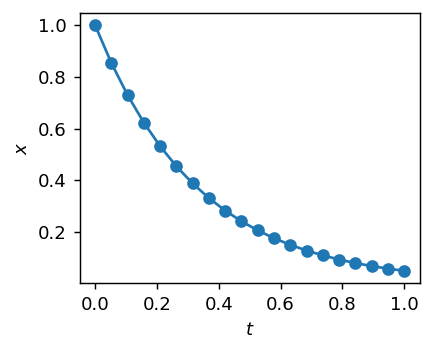

In [12]:
t = pt.linspace(0.0, 1.0, 20)
k = 3.0
x = pt.exp(-k * t)

### ============ Plot data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.375, 2.7), dpi=130)
ax.plot(t, x)
ax.scatter(t, x)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x$")
plt.show()

To plot the curve shown above, we evaluated the analytical function at 20 linearly spaced values of $t$ between 0 and 1. Before implementing the concept of physics-informed training, we fit the polynomial in the classical ML fashion. To do so, let's pretend that we do not know the analytical solution to the initial value problem, but we only know the 20 pairs of $x_i$ and $t_i$ used for plotting. In ML languange, $t$ is the feature and $x$ is the label. We have a training dataset of 20 feature-label pairs. We want to use this dataset to create a simple regression model. As ansatz, we use a polynomial of the form:

$$
  \hat{x}(t) = at^2+bt+1.
$$
Note that we set the intercept to 1 such that we do not have to worry about the initial condition. The model weights $a$ and $b$ are found by solving the minimization problem:

$$
  \underset{a,b}{\mathrm{argmin}}(L(a,b)),
$$
where $L(a,b)$ is the so-called *loss function*. The loss function in ML describes how well the "current parameter configuration" represents the training data. A typical loss function for regression is the mean squared error (MSE). For the present problem, the MSE reads:

$$
  L(a,b) = \frac{1}{2N_p}\sum\limits_{i=1}^{N_p}\left(x_i - \hat{x}_i\right)^2,
$$
where $N_p$ is the number of data points in the training dataset (20) and $\hat{x}_i = \hat{x}(t=t_i)$ is the polynomial ansatz evaluated at $t_i$. One of the simplest algorithms to find the parameters leading to a minimal loss is **gradient decent**. In gradient decent, we compute the gradient of the loss function with respect to the weight and nudge the weights in the negative gradient direction. Employing the chain rule, the loss gradient is:

$$
\begin{align}
  \frac{\partial L}{\partial a} &= \frac{1}{N_p}\sum\limits_{i=1}^{N_p}\left(x_i - \hat{x}_i\right) \left(-\frac{\partial \hat{x}_i}{\partial a}\right),\\
  \frac{\partial L}{\partial b} &= \frac{1}{N_p}\sum\limits_{i=1}^{N_p}\left(x_i - \hat{x}_i\right) \left(-\frac{\partial \hat{x}_i}{\partial b}\right).
\end{align}
$$
Let's define these functions in code.

In [16]:
def ansatz(t, a, b):
    return a*t**2 + b*t + 1

def da_ansatz(t):
    return t**2

def db_ansatz(t):
    return t

def data_loss(t, x_true, a, b):
    loss = 0.5*(x_true - ansatz(t, a, b))**2
    return loss.mean()

def data_loss_gradient(t, x_true, a, b):
    diff = x_true - ansatz(t, a, b)
    da_loss = (diff * (-da_ansatz(t))).mean()
    db_loss = (diff * (-db_ansatz(t))).mean()
    return pt.stack((da_loss, db_loss))

In the next cell, the weights $a$ and $b$ are initialized with random values between 0 and 1. Then 5000 steps of gradient decent are performed to minimize the MSE loss. To visualize the optimization process, we save the loss and the weight configuration after every step.

In [29]:
weights = 2 * pt.rand(2) - 1.0
data_loss_values = []
max_iter = 1000
data_weights_history = pt.zeros(max_iter+1, 2)
data_weights_history[0, :] = weights
for i in range(max_iter):
    weights -= 1.0*data_loss_gradient(t, x, *weights)
    data_weights_history[i+1, :] = weights
    data_loss_values.append(data_loss(t, x, *weights))

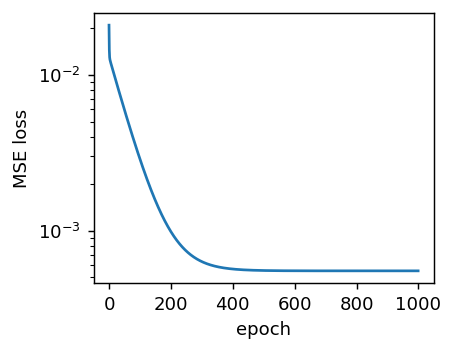

In [30]:
### ============ Plot data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.375, 2.7), dpi=130)
ax.plot(range(len(data_loss_values)), data_loss_values)
ax.set_xlabel("epoch")
ax.set_ylabel("MSE loss")
plt.yscale("log")
plt.show()

The optimal weights are found after about 5000 iterations (epochs). Note that there are plenty of advanced optimization algorithms, which could find the minimum much quicker. Let's plot the optimized polynomial and compare it against the exact solution.

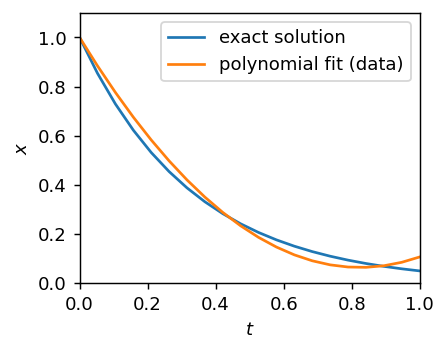

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.375, 2.7), dpi=130)
ax.plot(t, x, label="exact solution")
ax.plot(t, ansatz(t, *weights), label="polynomial fit (data)")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x$")
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

The agreement between polynomial and exact solution is acceptable considering that the model has only two adjustable parameters. An advantage of having only two parameters is also the possibility to visualize the loss function (loss landscape) and steps we undertook to get to the optimal solution. The loss landscape is plotted as a filled contour plot; see figure below. The red markers show the weight configuration after every 10th epoch.

We could also plot the loss landscape as a [surface plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) with the height being the loss value as a function of the weights $a$ and $b$. If you randomly pick any two points on the resulting surface and connect them by a straight line, you would notice that you never cut through the surface. Therefore, we say the loss function is [convex](https://en.wikipedia.org/wiki/Convex_function), and the problem we solved is a convex optimization problem.

In [33]:
a_plot = pt.linspace(weights[0]-4, weights[0]+4, 100)
b_plot = pt.linspace(weights[1]-4, weights[1]+4, 100)
aa, bb = pt.meshgrid(a_plot, b_plot)
loss_surface = pt.zeros_like(aa.flatten())
for i, (a, b) in enumerate(zip(aa.flatten(), bb.flatten())):
    loss_surface[i] = data_loss(t, x, a, b)
loss_surface = loss_surface.reshape(aa.shape)

c:\DevProgram\miniconda3\envs\py39ml\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\b\abs_f0dma8qm3d\croot\pytorch_1669187301762\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


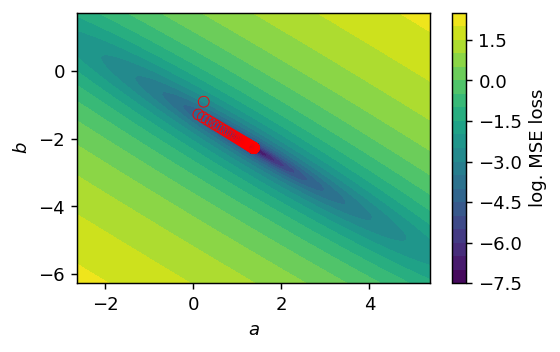

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.375, 2.7), dpi=130)
cont = plt.contourf(aa, bb, pt.log(loss_surface), levels=20)
ax.scatter(data_weights_history[::10, 0], data_weights_history[::10, 1], facecolors="none", edgecolor="r", lw=0.5)
plt.xlabel(r"$a$")
plt.ylabel(r"$b$")
plt.colorbar(cont, label="log. MSE loss")
plt.show()

Now let's make the *polynomial physics-informed*! The core idea is to embed the initial value problem in the loss function. The same procedure also works for more complex initial boundary value problems. First, the ordinary differential equation (ODE) is re-written as:

$$
  \frac{\mathrm{d}x}{\mathrm{d}t} + kx = 0
$$
We now that the ODE must be fulfilled for any input $t$. Therefore, we can replace the variable $x$ with the ansatz $\hat{x}$, evaluate the ansatz and its derivative with respect to $t$ at selected control points in the interval between 0 and 1, and formulate the loss function in terms of the residual (if the ansatz fulfills the ODE perfectly the sum over all control points would always be zero):

$$
  L(a,b) = \frac{1}{2N_c}\sum\limits_{i=1}^{N_c}\left(\left.\frac{\mathrm{d}\hat{x}}{\mathrm{d}t}\right|_i + k\hat{x}_i\right)^2.
$$
$N_c$ is the number of control points, which is also 20 in this case since the same points $t_i$ as for platting will be used. The term $\left.\frac{\mathrm{d}\hat{x}}{\mathrm{d}t}\right|_i$ is the derivative of the polynomial with respect to $t$ evaluated at $t_i$. Computing the gradient of the loss with respect to the weights becomes slightly more complex:

$$
\begin{align}
  \frac{\partial L}{\partial a} &= \frac{1}{N_c}\sum\limits_{i=1}^{N_c}\left(\left.\frac{\mathrm{d}\hat{x}}{\mathrm{d}t}\right|_i + k\hat{x}_i\right)\frac{\partial}{\partial a}\left(\left.\frac{\mathrm{d}\hat{x}}{\mathrm{d}t}\right|_i + k\hat{x}_i\right),\\
  \frac{\partial L}{\partial b} &= \frac{1}{N_c}\sum\limits_{i=1}^{N_c}\left(\left.\frac{\mathrm{d}\hat{x}}{\mathrm{d}t}\right|_i + k\hat{x}_i\right)\frac{\partial}{\partial b}\left(\left.\frac{\mathrm{d}\hat{x}}{\mathrm{d}t}\right|_i + k\hat{x}_i\right).
\end{align}
$$
The results for the last term in each derivative can be inferred from the functions implemented in the cell below. The rest of the optimization process is analogous to the classical regression approach.

In [42]:
def dt_ansatz(t, a, b):
    return 2*a*t + b

def ode_ansatz(t, k, a, b):
    return dt_ansatz(t, a, b) + k*ansatz(t, a, b)

def da_ode_ansatz(t, k):
    return 2*t+k*t**2

def db_ode_ansatz(t, k):
    return 1+k*t

def ode_loss(t, k, a, b):
    loss = (ode_ansatz(t, k, a, b))**2
    return loss.mean()

def ode_loss_gradient(t, k, a, b):
    da_loss = (ode_ansatz(t, k, a, b) * da_ode_ansatz(t, k)).mean()
    db_loss = (ode_ansatz(t, k, a, b) * db_ode_ansatz(t, k)).mean()
    return pt.stack((da_loss, db_loss))

In [43]:
weights = 2 * pt.rand(2) - 1.0
ode_loss_values = []
max_iter = 1000
weights_history = pt.zeros(max_iter+1, 2)
weights_history[0, :] = weights
for i in range(max_iter):
    weights -= 0.1*ode_loss_gradient(t, k, *weights)
    weights_history[i+1, :] = weights
    ode_loss_values.append(ode_loss(t, k, *weights))

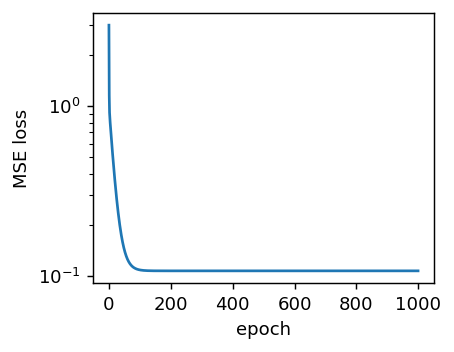

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.375, 2.7), dpi=130)
ax.plot(range(len(ode_loss_values)), ode_loss_values)
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.yscale("log")
plt.show()

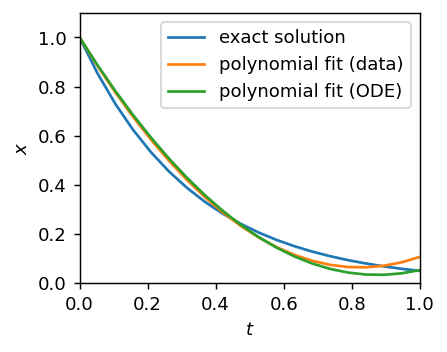

In [52]:
t = pt.linspace(0.0, 1.0, 20)
k = 3.0
x = pt.exp(-k * t)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.375, 2.7), dpi=130)
ax.plot(t, x, label="exact solution")
ax.plot(t, ansatz(t, *data_weights_history[-1]), label="polynomial fit (data)")
ax.plot(t, ansatz(t, *weights), label="polynomial fit (ODE)")
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.legend()
plt.show()

Both polynomial fits look very similar. How much the second polynomial is *informed* about the decay process is left to your interpretation.

In [53]:
a_plot = pt.linspace(weights[0]-4, weights[0]+4, 100)
b_plot = pt.linspace(weights[1]-4, weights[1]+4, 100)
aa, bb = pt.meshgrid(a_plot, b_plot)
loss_surface = pt.zeros_like(aa.flatten())
for i, (a, b) in enumerate(zip(aa.flatten(), bb.flatten())):
    loss_surface[i] = ode_loss(t, k, a, b)
loss_surface = loss_surface.reshape(aa.shape)

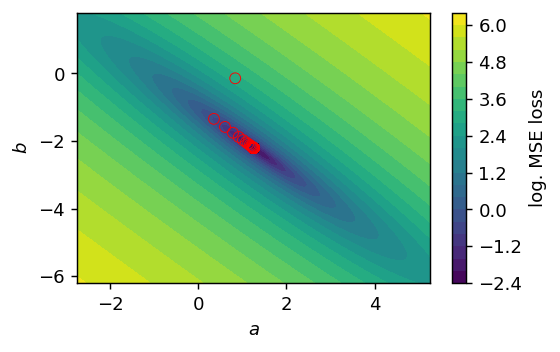

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.375, 2.7), dpi=130)
cont = plt.contourf(aa, bb, pt.log(loss_surface), levels=20)
ax.scatter(weights_history[::10, 0], weights_history[::10, 1], facecolors="none", edgecolor="r", lw=0.5)
plt.xlabel(r"$a$")
plt.ylabel(r"$b$")
plt.colorbar(cont, label="log. MSE loss")
plt.show()

Constraining the loss function based on physical relations is certainly a pleasing idea. However, if neural networks are used as ansatz, formulating the loss in terms of partial derivatives also introduces several new challenges, which are only briefly listed below:

- activation functions: if higher-order derivative with respect to the network's input have to be computed, the number of possible activation functions is very limited (the derivative must not be zero); these activation functions cause so-called vanishing or exploding gradients, which have to be counteracted by other measures like batch normalization
- training and evaluating PINNs is slow due to multiple backpropagation loops (some algorithm to compute derivatives automatically) and the evaluation of many exponential functions
- fulfilling initial and boundary conditions requires additional terms in the loss function, for which suitable weighting factors must be determined
- generating training data and following the classical regression approach is typically faster and leads to more accurate models (even though they are not *informed*)

### Advanced neural network architectures

There is a zoo of neural network building blocks designed for tasks in speech recognition, computer vision, or translation. Most of these architectures are not particularly useful when combined with CFD applications. The focus of this lecture is on solving challenging problems in CFD with the aid of ML. The exact algorithm used to solve the ML part of the problem is secondary and, oftentimes, there are multiple suitable options available.

```{seealso}
1. [Introduction ML in CFD](https://thangckt.github.io/lec_ml_cfd/notebooks/ml_cfd_intro.html)
2. [Comparison between Pytorch Tensor and Numpy Array](https://medium.com/@ashish.iitr2015/comparison-between-pytorch-tensor-and-numpy-array-de41e389c213)
```